Build a
network consisting of four artificial neurons. Two neurons receive inputs to the network,
and the other two give outputs from the network.

In [1]:
import random

In [2]:
def ann_output(inputs, weights):
    salida1 = inputs[0]*weights[0] + inputs[1]*weights[2]
    salida2 = inputs[0]*weights[1] + inputs[1]*weights[3]
    print(f"El input {inputs} tiene como salida {[salida1,salida2]} ")
    return([salida1, salida2])
    


1.- Now, set all the weights to be equal to one. This means that the information will flow
unaffected. Compute the outputs of the network for the following inputs: (1,1), (1,0), (0,1),
(0,0), (-1,1), (-1,-1). 

In [3]:
pesos = [1]*4
entradas=[[1,1],[1,0],[0,1],[0,0],[-1,1],[-1,-1]]

In [4]:
for entrada in entradas:
    ann_output(entrada,pesos)

El input [1, 1] tiene como salida [2, 2] 
El input [1, 0] tiene como salida [1, 1] 
El input [0, 1] tiene como salida [1, 1] 
El input [0, 0] tiene como salida [0, 0] 
El input [-1, 1] tiene como salida [0, 0] 
El input [-1, -1] tiene como salida [-2, -2] 


2.- Good. Now, choose weights among 0.5, 0, and -0.5, and set them randomly along the
network. Compute the outputs for the same inputs as above. Change some weights and see
how the behaviour of the networks changes.Which weights are more critical (if you change
those weights, the outputs will change more dramatically)? 

In [5]:
pesos2 = [0.5, -0.5, 0, 0.5]

In [6]:
for entrada in entradas:
    ann_output(entrada,pesos2)


El input [1, 1] tiene como salida [0.5, 0.0] 
El input [1, 0] tiene como salida [0.5, -0.5] 
El input [0, 1] tiene como salida [0.0, 0.5] 
El input [0, 0] tiene como salida [0.0, 0.0] 
El input [-1, 1] tiene como salida [-0.5, 1.0] 
El input [-1, -1] tiene como salida [-0.5, 0.0] 


3.-Now, suppose we want a network like the one we are working with, such that the
outputs should be the inputs in inverse order (e.g. (0.3,0.7)->(0.7,0.3)).

In [7]:
pesos3 = [0,1,1,0]

entrada3 = [0.3,0.7]
ann_output(entrada3,pesos3)

El input [0.3, 0.7] tiene como salida [0.7, 0.3] 


[0.7, 0.3]

4.-Now, let’s set thresholds to the neurons. This is, if the previous output of the neuron
(weighted sum of the inputs) is greater than the threshold of the neuron, the output of the
neuron will be one, and zero otherwise. Set thresholds to a couple of the already developed
networks, and see how this affects their behaviour

In [8]:
def ann_output_thresholds(inputs, weights,thresholds):
    neuronas = [inputs[0]*weights[0] + inputs[1]*weights[2], inputs[0]*weights[1] + inputs[1]*weights[3] ]
    resultados = [0,0]
    for i in range(2):
        if neuronas[i] >= thresholds[i]:
            resultados[i]=1
        else:
            pass
    print(f"las neuronas {neuronas}")
    print(f"los umbrales {thresholds}")
    return(f"Los inputs {inputs} tienen como resultado {resultados}")

In [9]:
ann_output_thresholds(entrada3,pesos2, [5 ,0.05] )

las neuronas [0.15, 0.19999999999999998]
los umbrales [5, 0.05]


'Los inputs [0.3, 0.7] tienen como resultado [0, 1]'

In [10]:
ann_output_thresholds(entrada3,pesos2, [random.random(),random.random()] )

las neuronas [0.15, 0.19999999999999998]
los umbrales [0.6670128886421974, 0.037913346274887516]


'Los inputs [0.3, 0.7] tienen como resultado [0, 1]'

Now, suppose we have a network which will receive for inputs only zeroes and/or
ones. Adjust the weights and thresholds of the neurons so that the output of the first output
neuron will be the conjunction (AND) of the network inputs (one when both inputs are
one, zero otherwise), and the output of the second output neuron will be the disjunction
(OR) of the network inputs (zero in both inputs are zeroes, one otherwise). You can see
that there is more than one network which will give the requested result

In [11]:
def logical_ann_1(entrada):
    neurona_and = min(entrada[0],entrada[1])
    neurona_or = max(entrada[0],entrada[1])
    print(f"output (and) es {neurona_and}" )
    print(f"output (or) es {neurona_or}" )
    return(neurona_and, neurona_or)

In [12]:
logical_ann_1([0,1])

output (and) es 0
output (or) es 1


(0, 1)

In [13]:
logica_pesos = [0.5, 0.5, 1, 1]
ann_output_thresholds([0,0], logica_pesos, [1,0.5] )

las neuronas [0.0, 0.0]
los umbrales [1, 0.5]


'Los inputs [0, 0] tienen como resultado [0, 0]'

# Backpropagation

In [14]:
import numpy as np

input_size = 3
hidden_size = 2
output_size = 3

W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def forward(X):

    z1 = np.dot(X, W1)
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2)
    y_hat = tanh(z2)
    
    print(f"entra {X}")
    print(f"sale {y_hat} \n")
     
    return y_hat, z1, a1, z2


X = np.array([1.0, 0.25, -0.5])
y_hat = forward(X)

entra [ 1.    0.25 -0.5 ]
sale [-0.46775781  0.97953566 -0.61669563] 



In [15]:
X_1 = np.array([1.0, 0.25, -0.5]).reshape(1, -1) 
Y_target = np.array([1.0, -1.0, 0.0])


In [16]:
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_d(x):
    return 1 - np.tanh(x) ** 2

In [17]:
def backward(X, Y_target, y_hat, z1, a1, z2):
    delta3 = (y_hat - Y_target)*tanh_d(z2)
    dW2 = np.dot(a1.T, delta3)
    
    delta2 = np.dot(delta3, W2.T) * sigmoid_d(z1)
    dW1 = np.dot(X.reshape(-1,1), delta2.reshape(1,-1))
    
    
    return dW1, dW2

In [18]:
learning_rate = 0.3  #eta
repeticiones = 100
error = []

for i in range(repeticiones):
    y_hat, z1, a1, z2 = forward(X_1)
    er = np.linalg.norm(y_hat - Y_target)
    error.append(er)
    
    print(f"epoca {i} tiene error: {er}")
    
    dW1, dW2 = backward(X_1, Y_target, y_hat, z1, a1, z2)
    
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2

entra [[ 1.    0.25 -0.5 ]]
sale [[-0.46775781  0.97953566 -0.61669563]] 

epoca 0 tiene error: 2.5403125592657783
entra [[ 1.    0.25 -0.5 ]]
sale [[-0.17145249  0.97743246 -0.55884334]] 

epoca 1 tiene error: 2.3653426675920595
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.13618832  0.97561445 -0.49782309]] 

epoca 2 tiene error: 2.2129281316969176
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.34131685  0.97397799 -0.42690207]] 

epoca 3 tiene error: 2.1243111718284378
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.461252    0.97223402 -0.34883072]] 

epoca 4 tiene error: 2.0740393681795415
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.53698528  0.97029084 -0.27234531]] 

epoca 5 tiene error: 2.042204838248907
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.58940912  0.96811724 -0.20493974]] 

epoca 6 tiene error: 2.0209083722337033
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.62823541  0.96566866 -0.15024828]] 

epoca 7 tiene error: 2.006149726898678
entra [[ 1.    0.25 -0.5 ]]
sale [[ 0.65830286  0.96287486 -0.10827502]] 

epoca 8

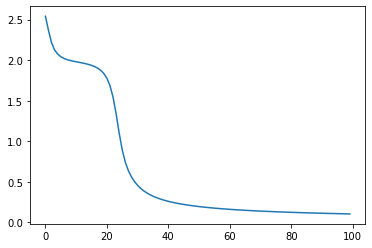

In [19]:
import matplotlib.pyplot as plt

dominio=[x for x in range(len(error))]
plt.plot(dominio, error)
plt.show()
